This is a follow along Notebook for Josh Starmer's StatQuest: PCA in Python. <br>
Link: https://www.youtube.com/watch?v=Lsue2gEM9D0

In [1]:
# dependencies
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
# generate data
# define 100 gene names
genes = ['gene' + str(i) for i in range(1, 101)]
# define two types of samples as column names
wt = ['wt' + str(i) for i in range(1, 6)]
ko = ['ko' + str(i) for i in range(1, 6)]
# create a pandas data frame
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
# populate some random data into the data frame
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)

In [4]:
# check the data
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,956,956,1004,969,938,958,979,965,1010,956
gene2,426,417,422,441,457,341,318,343,329,344
gene3,829,852,877,848,823,609,561,600,596,575
gene4,972,951,949,952,970,507,485,483,506,501
gene5,17,14,22,19,17,152,155,127,157,130


In [5]:
# check the data (2)
data.shape

(100, 10)

In [6]:
# calculate PCA

# first, center and scale the data
scaled_data = preprocessing.scale(data.T)
# alternative way
# scaled_data = StandardScaler().fit_transform(data.T)

# create a PCA object, and use it to fit the scaled data
pca = PCA()
pca.fit(scaled_data)

# generate coordinates for graphs
pca_data = pca.transform(scaled_data)

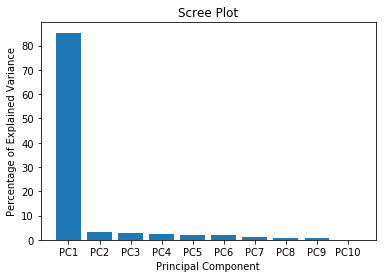

In [7]:
# generate scree plot

# calcuate percentage of variation for each principle components
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)

# generate labels for plot
labels = ['PC' + str(i) for i in range(1, len(per_var)+1)]

# generate scree plot (bar graph)
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("Scree Plot")
plt.show()

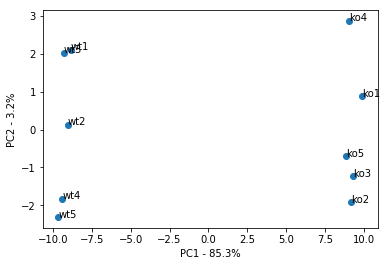

In [8]:
# draw PCA plot

# generate a new matrix
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

# generate PCA plot (scatter plot)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel("PC1 - {0}%".format(per_var[0]))
plt.ylabel("PC2 - {0}%".format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

In [9]:
# check loading scores of PC1
# create a pandas series object
loading_scores = pd.Series(pca.components_[0], index=genes)
# note: PCs are zero-indexed, so PC1 = 0

# sort loading scores based on their absolute value (magnitude)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

# get names of top 10 indexes (gene names)
top_10_genes = sorted_loading_scores[0:10].index.values

# print top 10 genes and loading scores
loading_scores[top_10_genes]
# values are pretty close showed that multiple genes affected PC1

gene79   -0.108190
gene74   -0.108172
gene75   -0.108126
gene59    0.108124
gene87    0.108122
gene28   -0.108094
gene47   -0.108086
gene4    -0.108070
gene71   -0.108068
gene54   -0.108061
dtype: float64